# Soal 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('profesi.csv', delimiter = '|')
df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


## 1. Ada berapa jenis profesi yang ada dalam dataset tersebut? Sebutkan!

In [3]:
print(df['occupation'].nunique())
print()
print(list(df['occupation'].unique()))

21

['technician', 'other', 'writer', 'executive', 'administrator', 'student', 'lawyer', 'educator', 'scientist', 'entertainment', 'programmer', 'librarian', 'homemaker', 'artist', 'engineer', 'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor']


## 2. Buatlah sebuah dataframe yang menunjukkan data usia maksimal, minimal & rata-ratanya, kemudian dikelompokkan berdasarkan profesi & gender!

In [4]:
age_grouped = df.groupby(['occupation', 'gender']).agg(max_usia=('age', 'max'), min_usia=('age', 'min'), rerata_usia=('age','mean'))
age_grouped

max_usia  min_usia  rerata_usia
occupation    gender                                 
administrator F             62        22    40.638889
              M             70        21    37.162791
artist        F             48        19    30.307692
              M             45        20    32.333333
doctor        M             64        28    43.571429
educator      F             51        23    39.115385
              M             63        25    43.101449
engineer      F             36        23    29.500000
              M             70        22    36.600000
entertainment F             38        24    31.000000
              M             50        15    29.000000
executive     F             49        39    44.000000
              M             69        22    38.172414
healthcare    F             53        22    39.818182
              M             62        28    45.400000
homemaker     F             50        20    34.166667
              M             23        23    23.000000
lawyer        F             51        28    39.500000
              M             53        21    36.200000
librarian     F             59        26    40.000000
              M             69        23    40.000000
marketing     F             50        24    37.200000
              M             55        24    37.875000
none          F             55        26    36.500000
              M             33        11    18.600000
other         F             55        18    35.472222
              M             64        13    34.028986
programmer    F             38        26    32.166667
              M             63        20    33.216667
retired       F             70        70    70.000000
              M             73        51    62.538462
salesman      F             33        18    27.000000
              M             66        21    38.555556
scientist     F             31        26    28.333333
              M             55        23    36.321429
student       F             38        13    20.750000
              M             42         7    22.669118
technician    F             38        38    38.000000
              M             55        21    32.961538
writer        F             56        18    37.631579
              M             60        21    35.346154

## 3. Buatlah sebuah dataframe yang menunjukkan persentase pria & wanita tiap profesi!

In [5]:
data = pd.crosstab(df['occupation'],df['gender']).apply(lambda x: (x/x.sum())*100, axis=1)
# df_gender = pd.DataFrame(data)
female = data['F'].reset_index()['F']
male = data['M'].reset_index()['M']
occupation = data.reset_index()['occupation']

data = {'%male':list(male), '%female':list(female)}
df_gender = pd.DataFrame(data, index=occupation)
df_gender['%total'] = df_gender['%male'] + df_gender['%female']
df_gender.index.name=None
df_gender[0:10]

,%male,%female,%total
administrator,54.430380,45.569620,100.0
artist,53.571429,46.428571,100.0
doctor,100.000000,0.000000,100.0
educator,72.631579,27.368421,100.0
engineer,97.014925,2.985075,100.0
entertainment,88.888889,11.111111,100.0
executive,90.625000,9.375000,100.0
healthcare,31.250000,68.750000,100.0
homemaker,14.285714,85.714286,100.0
lawyer,83.333333,16.666667,100.0


# Soal 2

## Harga Historis Saham Provider Telco Indonesia

Disediakan 4 buah file .csv yang berisi harga historis saham harian selama 3 bulan terakhir (18/Mar/2019 - 14/Jun/2019) dari 4 perusahaan provider telekomunikasi ternama di Indonesia. Unduh file .csv dari repo ini:

Nama Provider	
PT. XL Axiata Tbk:	EXCL.JK.csv
PT Smartfren Telecom Tbk:	FREN.JK.csv
PT Indosat Tbk	ISAT.JK.csv:
PT Telekomunikasi Indonesia: Tbk	TLKM.JK.csv

## 1. Buatlah sebuah file python maupun jupyter notebook .ipynb yang mengakses data dari ke-4 file .csv tersebut, kemudian tampilkan data plot harga penutupan (close) harian seluruh data yang ada. Output yang diharapkan berupa grafik garis yang menampilkan harga penutupan (close) harian dari ke-4 perusahaan telco selama 3 bulan terakhir:

In [6]:
#read data
df_excl = pd.read_csv('EXCL.JK.csv')
df_fren = pd.read_csv('FREN.JK.csv')
df_isat = pd.read_csv('ISAT.JK.csv')
df_tlkm = pd.read_csv('TLKM.JK.csv')

In [7]:
df_tlkm

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-18,3770.0,3820.0,3760.0,3820.0,3716.218506,44322600
1,2019-03-19,3800.0,3820.0,3770.0,3780.0,3677.305176,33156500
2,2019-03-20,3810.0,3820.0,3750.0,3760.0,3657.848633,42784600
3,2019-03-21,3800.0,3810.0,3780.0,3790.0,3687.033691,36527500
4,2019-03-22,3800.0,3820.0,3790.0,3800.0,3696.761963,26772900
...,...,...,...,...,...,...,...
60,2019-06-10,4000.0,4060.0,3970.0,4040.0,3930.241699,222522800
61,2019-06-11,4010.0,4060.0,4000.0,4020.0,3910.784912,88861700
62,2019-06-12,3880.0,3950.0,3840.0,3940.0,3940.000000,134724400
63,2019-06-13,3940.0,3990.0,3900.0,3990.0,3990.000000,115734700


In [8]:
df_excl['Date'] = pd.to_datetime(df_excl.Date, format='%Y-%m-%d')
df_fren['Date'] = pd.to_datetime(df_fren.Date, format='%Y-%m-%d')
df_isat['Date'] = pd.to_datetime(df_isat.Date, format='%Y-%m-%d')
df_tlkm['Date'] = pd.to_datetime(df_tlkm.Date, format='%Y-%m-%d')

In [9]:
df_tlkm

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-18,3770.0,3820.0,3760.0,3820.0,3716.218506,44322600
1,2019-03-19,3800.0,3820.0,3770.0,3780.0,3677.305176,33156500
2,2019-03-20,3810.0,3820.0,3750.0,3760.0,3657.848633,42784600
3,2019-03-21,3800.0,3810.0,3780.0,3790.0,3687.033691,36527500
4,2019-03-22,3800.0,3820.0,3790.0,3800.0,3696.761963,26772900
...,...,...,...,...,...,...,...
60,2019-06-10,4000.0,4060.0,3970.0,4040.0,3930.241699,222522800
61,2019-06-11,4010.0,4060.0,4000.0,4020.0,3910.784912,88861700
62,2019-06-12,3880.0,3950.0,3840.0,3940.0,3940.000000,134724400
63,2019-06-13,3940.0,3990.0,3900.0,3990.0,3990.000000,115734700


In [10]:
plt.style.use('ggplot')

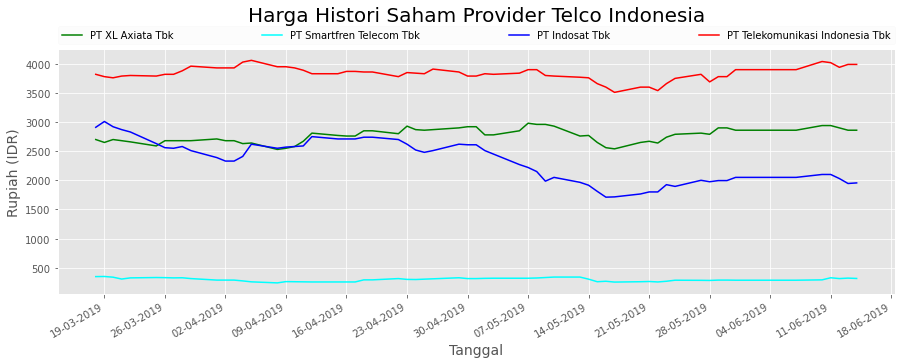

In [11]:
week = mdates.WeekdayLocator()
date_fmt = mdates.DateFormatter('%d-%m-%Y')
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df_excl['Date'], df_excl['Close'], color='green', label = 'PT XL Axiata Tbk')
ax.plot(df_fren['Date'], df_fren['Close'], color='cyan', label = 'PT Smartfren Telecom Tbk')
ax.plot(df_isat['Date'], df_isat['Close'], color='blue', label = 'PT Indosat Tbk')
ax.plot(df_tlkm['Date'], df_tlkm['Close'], color='red', label='PT Telekomunikasi Indonesia Tbk')

# format the ticks
ax.xaxis.set_major_locator(week)
ax.xaxis.set_major_formatter(date_fmt)
fig.autofmt_xdate()

plt.title('Harga Histori Saham Provider Telco Indonesia', fontsize=20, pad=28)
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand', borderaxespad=0, ncol = len(ax.lines), framealpha=0.1) 
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Rupiah (IDR)', fontsize=14)
plt.show()

## 2. Tampilkan data plot harga penutupan (close) harian selama bulan April 2019. Output yang diharapkan berupa grafik garis yang menampilkan harga penutupan (close) harian dari ke-4 perusahaan telco selama bulan April 2019:

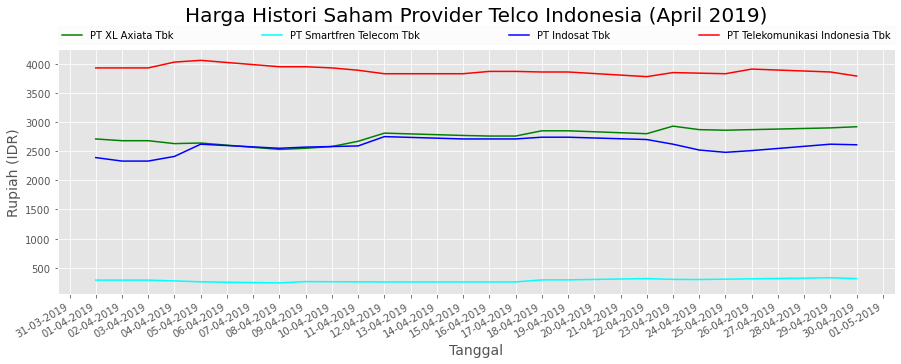

In [12]:
day = mdates.DayLocator()
date_fmt = mdates.DateFormatter('%d-%m-%Y')
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df_excl[df_excl['Date'].dt.month==4]['Date'], df_excl[df_excl['Date'].dt.month==4]['Close'], color='green', label = 'PT XL Axiata Tbk')
ax.plot(df_fren[df_fren['Date'].dt.month==4]['Date'], df_fren[df_fren['Date'].dt.month==4]['Close'], color='cyan', label = 'PT Smartfren Telecom Tbk')
ax.plot(df_isat[df_isat['Date'].dt.month==4]['Date'], df_isat[df_isat['Date'].dt.month==4]['Close'], color='blue', label = 'PT Indosat Tbk')
ax.plot(df_tlkm[df_tlkm['Date'].dt.month==4]['Date'], df_tlkm[df_tlkm['Date'].dt.month==4]['Close'], color='red', label='PT Telekomunikasi Indonesia Tbk')

# format the ticks
ax.xaxis.set_major_locator(day)
ax.xaxis.set_major_formatter(date_fmt)
fig.autofmt_xdate()

plt.title('Harga Histori Saham Provider Telco Indonesia (April 2019)', fontsize=20, pad=28)
plt.legend( bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand', borderaxespad=0, ncol = len(ax.lines), framealpha=0.1)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Rupiah (IDR)', fontsize=14)
plt.show()

# Soal 3

## Disediakan dataset laporan tingkat kebahagiaan di berbagai negara di dunia, unduh di repo ini atau klik : World Happiness lalu buatlah sebuah file notebook (.ipynb) dan lakukan Exploratory Data Analysis terhadap Dataset tersebut.

In [13]:
df_happy = pd.read_csv('2019.csv')
df_happy

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [14]:
data_detail = []

for i in df_happy.columns:
    data_detail.append([
        i,
        df_happy[i].dtypes,
        df_happy[i].isna().sum(),
        round((((df_happy[i].isna().sum()) / len(df_happy)) * 100),2),
        df_happy[i].nunique(),
        df_happy[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data_detail, columns=[
    'Data Features(Col)',
    'Data Types',
    'Null Total',
    'Null Percentage %',
    'Number of Uniqueness',
    'Unique Sample'
])

,Data Features(Col),Data Types,Null Total,Null Percentage %,Number of Uniqueness,Unique Sample
0,Overall rank,int64,0,0.0,156,"[30, 48]"
1,Country or region,object,0,0.0,156,"[Romania, Germany]"
2,Score,float64,0,0.0,155,"[5.757999999999999, 4.212]"
3,GDP per capita,float64,0,0.0,146,"[0.574, 1.0290000000000001]"
4,Social support,float64,0,0.0,145,"[1.4569999999999999, 1.431]"
5,Healthy life expectancy,float64,0,0.0,119,"[0.779, 0.44299999999999995]"
6,Freedom to make life choices,float64,0,0.0,130,"[0.36200000000000004, 0.39399999999999996]"
7,Generosity,float64,0,0.0,118,"[0.263, 0.245]"
8,Perceptions of corruption,float64,0,0.0,113,"[0.18, 0.036000000000000004]"


In [15]:
df_happy.describe(include='all')

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
unique,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,78.500000,NaN,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,NaN,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,NaN,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,NaN,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,NaN,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,NaN,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250


In [16]:
df_happy.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [17]:
df_happy.rename(index=str, columns={
    'Overall rank': 'rank',
    'Country or region': 'country',
    'Score': 'score',
    'GDP per capita': 'gdp_capita',
    'Social support': 'social_support',
    'Healthy life expectancy': 'healthy_life_expetancy',
    'Freedom to make life choices': 'freedom_choices',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'preceptions_corruption'
}, inplace=True)

df_happy.columns

Index(['rank', 'country', 'score', 'gdp_capita', 'social_support',
       'healthy_life_expetancy', 'freedom_choices', 'generosity',
       'preceptions_corruption'],
      dtype='object')

In [18]:
df_happy.isnull().sum()

rank                      0
country                   0
score                     0
gdp_capita                0
social_support            0
healthy_life_expetancy    0
freedom_choices           0
generosity                0
preceptions_corruption    0
dtype: int64

Setelah data diload lalu kita cek kolom dan kelengkapan datanya. Terdapat 156 baris data dan tidak ada data yang null dalam data tersebut. Lalu nama kolom yag ada pada dataset tersebut masih belum standar python lalu kita rubah ke standar python.

## Tahapan EDA

- Selanjutnya coba kita lihat distirbusi data dari kolom numerikal
- Lihat korelasi antar kolom
- Setelah ditemukan nilai korelasi antar kolom, lihat regresi antar kolom teresebut.

In [19]:
df_happy.head()

,rank,country,score,gdp_capita,social_support,healthy_life_expetancy,freedom_choices,generosity,preceptions_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Distribusi data tiap kolom

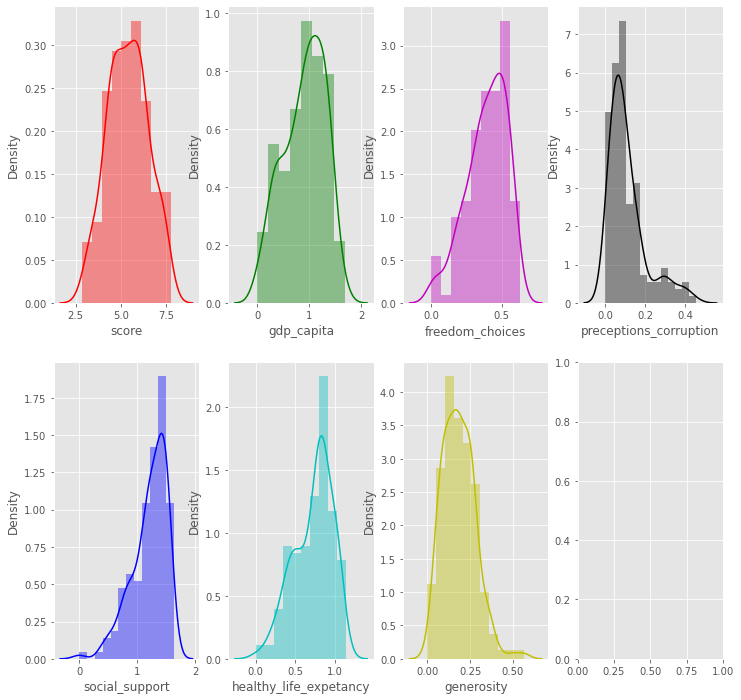

In [20]:
fig, axs = plt.subplots(2, 4, figsize=(12, 12))
sns.distplot(df_happy["score"], kde=True, color='r', ax=axs[0, 0])
sns.distplot(df_happy["gdp_capita"], kde=True, color='g', ax=axs[0, 1])
sns.distplot(df_happy["social_support"], kde=True, color='b', ax=axs[1, 0])
sns.distplot(df_happy["healthy_life_expetancy"], kde=True, color='c', ax=axs[1, 1])
sns.distplot(df_happy["freedom_choices"], kde=True, color='m', ax=axs[0, 2])
sns.distplot(df_happy["generosity"], kde=True, color='y', ax=axs[1, 2])
sns.distplot(df_happy["preceptions_corruption"], kde=True, color='k', ax=axs[0, 3])

plt.show()

Dilihat dari hasil distribusi data pada dataset world happiness, kita bisa lihat ada beberapa kolom yang persebaran datanya masuk kategori normal atau ring bell curve atau yang menuerupai bentuk lonceng seperti pada kolom score, gdc_capita. Ada juga yang right-skewed distribution seperti kolom preceptions_corruption dan generosity. Ada juga yang left skewed distribution seperti kolom social_support dan health_life_expetancy.

Dengan melihat pendistribusian data di tiap kolom, kita bisa dengan mudah memilih kolom mana yang akan kita gunakan untuk memprediksi. Dan biasanya yang masuk kategori distribusi data yang bagus itu adalah ring bell curve, namun data-data yang bertebaran di dunia lebih banyak yang skewed(bercondong).

### Korelasi antar kolom

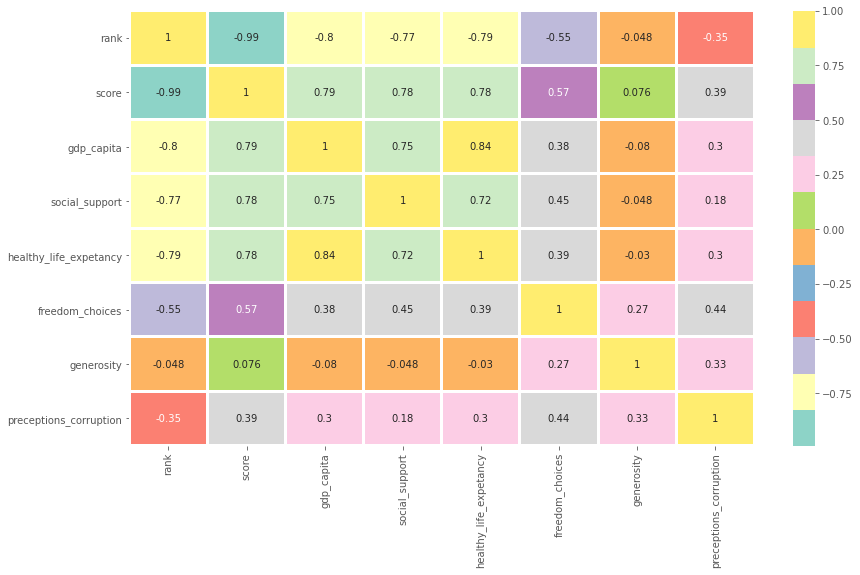

In [21]:
plt.figure(figsize=(14,8))
sns.heatmap(df_happy.corr(), annot=True, cmap='Set3', linewidth=2)
plt.show()

Nilai korelasi berkisar antara 1 sampai -1, nilai semakin mendekati 1 atau -1 berarti hubungan antara dua variabel semakin kuat. Sebaliknya, jika nilai mendekati 0 berarti hubungan antara dua variabel semakin lemah. Nilai positif menunjukkan hubungan searah (X naik, maka Y naik) sementara nilai negatif menunjukkan hubungan terbalik (X naik, maka Y turun). 

Maka dari itu dari hasil pencarian korelasi, kita bisa lihat adanya hubungan yang kuat pada beberapa kolom:
1. kolom score memiliki hubungan searah yang kuat dengan kolom gda_capita, social_support, dan healthy life expetacy.
2. kolom rank memiliki hubungan terbalik yang kuat dengan kolom score, gda_capita, social_support, dan healthy life expetacy.

Untuk memperkuat fakta akan korelasi kolom, kita bisa melanjutkannya dengan melihat hasil dari regresi linear dari kolom-kolom yang berhubungan tadi, baik berhubungan searah ataupun terbalik. Untuk itu, selanjutnya kita lakukan mengecekan regresi linear dengan plot.

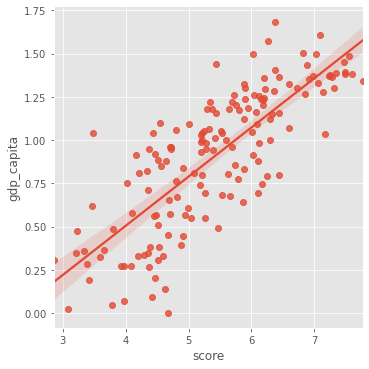

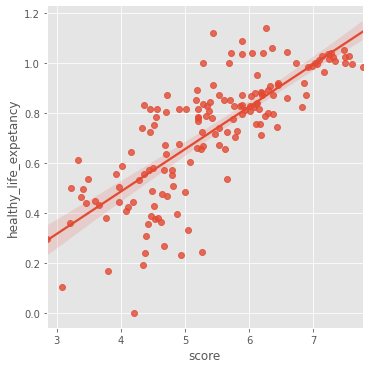

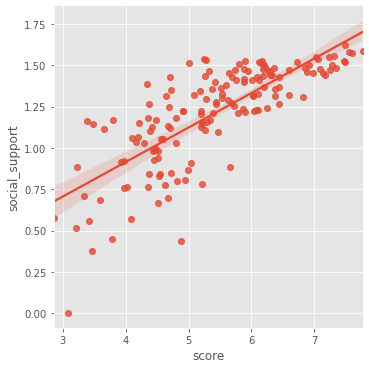

In [22]:
sns.lmplot(x ="score", y = "gdp_capita", data=df_happy)
sns.lmplot(x ="score", y = "healthy_life_expetancy", data=df_happy)
sns.lmplot(x ="score", y = "social_support", data=df_happy)
plt.show()

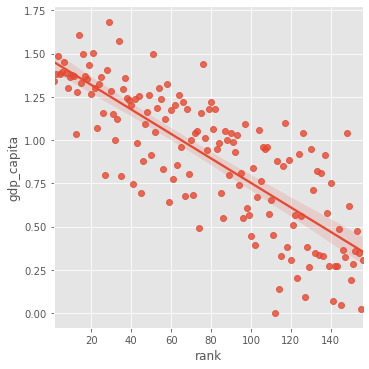

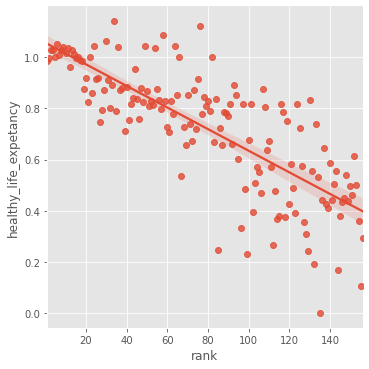

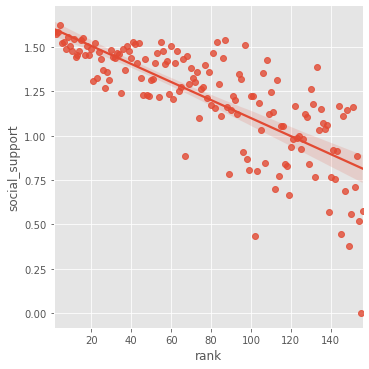

In [23]:
sns.lmplot(x ="rank", y = "gdp_capita", data=df_happy)
sns.lmplot(x ="rank", y = "healthy_life_expetancy", data=df_happy)
sns.lmplot(x ="rank", y = "social_support", data=df_happy)
plt.show()

Dari hasil pengecekan regresi linear dengan plot di atas, kita bisa lihat persebaran titik-titik atau data yang paling banyak mendekati garis gradien ada pada perbandingan antara kolom score-social_support untuk yang hubungan searah dan kolom rank-social_support untuk kolom yang terbalik.

Sehingga dapat disimpulkan bahwa adanya depedensi antara variabel bebas atau disini kolom score dan rank dengan variabel terikat yaitu kolom socia_support, bahwa:
1. Semakin tinggi score happiness suatu negara, maka akan semakin tinggi pula nilai social supportnya.
2. Semakin kecil nilai ranking suatu negara, maka akan semakin tinggi nilai social supportnya.

### Kelompokkan negara berdasarkan gdp_capita

Dengan mencari nilai rata-rata gdp_capita, setelah itu kita kalsifikasikan bagi negara yang gdp_capita nya dibawah rata-rata maka termasuk golongan negara berkembang. Sedangkan negara yang gdp_capita nya di atas rata-rata maka akan masuk kategori negara maju. 

In [24]:
df_happy['gdp_capita'].mean()

0.9051474358974363

In [25]:
df_happy['gdp_class'] = df_happy['gdp_capita'].apply(lambda x: 1 if x > df_happy['gdp_capita'].mean() else 0 )
df_happy

,rank,country,score,gdp_capita,social_support,healthy_life_expetancy,freedom_choices,generosity,preceptions_corruption,gdp_class
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,0


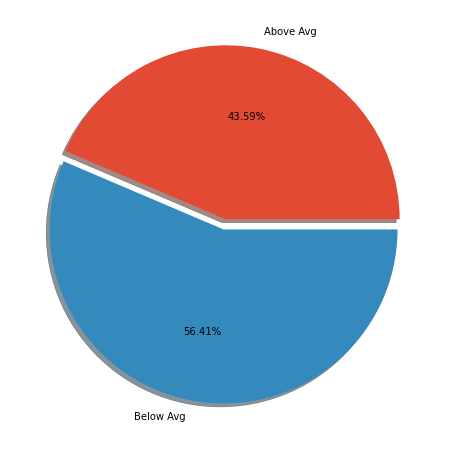

Jumlah negara yang dari segi gdp_capita nya di atas rata-rata: 68 negara
Jumlah negara yang dari segi gdp_capita nya di bawah rata-rata: 88 negara


In [26]:
gdp_classification = df_happy.groupby('gdp_class')['rank'].count().reset_index(name='counts')
plt.figure(figsize=(10,8))
plt.pie(gdp_classification['counts'], labels=['Above Avg','Below Avg'],
        shadow=True, 
        autopct = '%1.2f%%',
        explode = (0.03, 0.03)
       )
plt.show()
print('Jumlah negara yang dari segi gdp_capita nya di atas rata-rata:',gdp_classification.loc[0]['counts'], 'negara')
print('Jumlah negara yang dari segi gdp_capita nya di bawah rata-rata:',gdp_classification.loc[1]['counts'], 'negara')

In [27]:
print('Rata-rata score happiness index dari negara yang memiliki gdp_capita di atas rata-rata ialah:', round(df_happy[df_happy['gdp_class'] == 1]['score'].mean() , 2))
print('Rata-rata score happiness index dari negara yang memiliki gdp_capita di bawah rata-rata ialah:', round(df_happy[df_happy['gdp_class'] == 0]['score'].mean() , 2))

Rata-rata score happiness index dari negara yang memiliki gdp_capita di atas rata-rata ialah: 6.01
Rata-rata score happiness index dari negara yang memiliki gdp_capita di bawah rata-rata ialah: 4.62


### Kelompokkan negara berdasarkan healthy life expectancy

Kita akan mengenlompokkan negara berdasarkan tingkat harapan hidupnya dari berbagai quartal.
1. Di atas kuartal 3
2. Di antara kuartal 2 dan kuartal 3
3. Di antara kuarta 1 dan kuartal 2
4. Di bawah kuartal 1

Namun sebelum itu, kita lihat dulu apakah ada nilai yang outliers di dalam kolom healthy life expectancy?

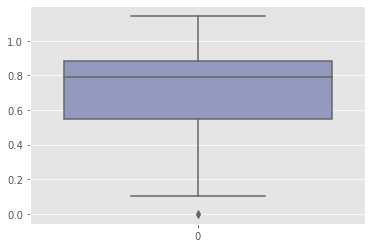

In [28]:
sns.boxplot(data=df_happy['healthy_life_expetancy'], palette='BuPu')
plt.show()

Dari hasil penelusuran data outliers di kolom healthy life expectancy, terdapat data outliers yang berada di bawah garis batas bawah. Pertama kita lihat dulu data apa yang outliers itu dengan mencari nilai batas bawah.

In [29]:
df_happy['healthy_life_expetancy'].describe()

count    156.000000
mean       0.725244
std        0.242124
min        0.000000
25%        0.547750
50%        0.789000
75%        0.881750
max        1.141000
Name: healthy_life_expetancy, dtype: float64

In [30]:
q1 = df_happy['healthy_life_expetancy'].describe()['25%']
q3 = df_happy['healthy_life_expetancy'].describe()['75%']
q2 = df_happy['healthy_life_expetancy'].describe()['50%']
iqr = q3 - q1
lowerlance = q1 - (1.5 * iqr)
print('batas atas quantity:', lowerlance)

batas atas quantity: 0.04675000000000007


In [31]:
df_happy[df_happy['healthy_life_expetancy'] < lowerlance]

,rank,country,score,gdp_capita,social_support,healthy_life_expetancy,freedom_choices,generosity,preceptions_corruption,gdp_class
134,135,Swaziland,4.212,0.811,1.149,0.0,0.313,0.074,0.135,0


Ternyata hanya ada satu negara (Swaziland) yang memiliki nilai healthy_life_expetancy di bawah batas bawah outliers. Karena hanya ada satu, kita biarkan saja karena kita mengelompokkannya juga tidak berdasarkan rata-rata.

In [32]:
df_happy['healthy_class'] = df_happy['healthy_life_expetancy'].apply(
    lambda x: 'I' if x >= q3 else ('II' if x >= q2 and x < q3 else('III' if x >=q1 and x <q2 else 'IV')) 
)
df_happy

,rank,country,score,gdp_capita,social_support,healthy_life_expetancy,freedom_choices,generosity,preceptions_corruption,gdp_class,healthy_class
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1,I
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1,I
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1,I
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1,I
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1,I
...,...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0,III
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0,IV
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0,IV
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,0,IV


Setelah berhasil mengelompokkan negara dalam 4 kuartil tingkat harapan hidup sehatnya, selanjutnya kita beri ilustrasi dari pembagian kelompok tadi menggunakan diagram batang.

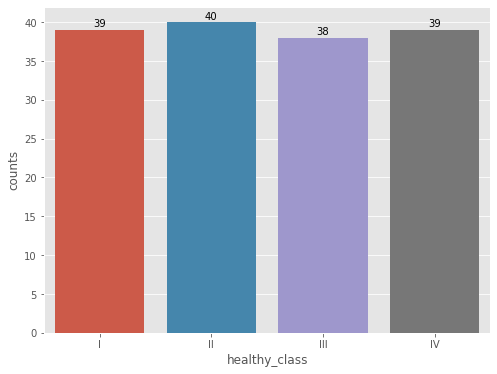

In [33]:
plt.figure(figsize=(8,6))
df_healthy_class = df_happy.groupby('healthy_class')['rank'].count().reset_index(name='counts')
graph = sns.barplot(x='healthy_class', y='counts', data=df_healthy_class)
for index, row in df_healthy_class.iterrows():
    graph.text(row.name, row.counts+0.4, row.counts,color='black', ha='center')

Kelas kuartil yang paling banyak dari pengelompokan healthy class ada pada kelas kuartil II. Negara yang berkelas II adalah:

In [34]:
df_happy[df_happy['healthy_class'] == 'II']

,rank,country,score,gdp_capita,social_support,healthy_life_expetancy,freedom_choices,generosity,preceptions_corruption,gdp_class,healthy_class
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128,1,II
20,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182,1,II
22,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073,1,II
27,28,Saudi Arabia,6.375,1.403,1.357,0.795,0.439,0.080,0.132,1,II
28,29,Qatar,6.374,1.684,1.313,0.871,0.555,0.220,0.167,1,II
31,32,Brazil,6.300,1.004,1.439,0.802,0.390,0.099,0.086,1,II
34,35,El Salvador,6.253,0.794,1.242,0.789,0.430,0.093,0.074,0,II
36,37,Bahrain,6.199,1.362,1.368,0.871,0.536,0.255,0.110,1,II
37,38,Slovakia,6.198,1.246,1.504,0.881,0.334,0.121,0.014,1,II
41,42,Lithuania,6.149,1.238,1.515,0.818,0.291,0.043,0.042,1,II


### Menampilkan rerata nilai freedom choices di tiap negara berdasarkan gdp_class dan healthy_class

Negara juga memiliki index kebebasan menentukan pilihannya, maka semakin tinggi nilainya maka negara tersebut semakin bebas berpendapat (Liberal). Untuk itu, berikan insight terhadapt nilai rata-rata dari kolom freedom_choices berdasarkan kelas gdpnya dan kelas healthy expetancy-nya.

In [35]:
pd.crosstab(index=df_happy['gdp_class'] , columns= df_happy['healthy_class'], values= df_happy['freedom_choices'], aggfunc='mean')

healthy_class,I,II,III,IV
gdp_class,,,,
0,NaN,0.438714,0.440625,0.295297
1,0.471564,0.380818,0.347643,0.422000


In [36]:
df_freedom = pd.crosstab(index=df_happy['gdp_class'] , columns= df_happy['healthy_class'], values= df_happy['freedom_choices'], aggfunc='mean').reset_index()
df_freedom

healthy_class,gdp_class,I,II,III,IV
0,0,NaN,0.438714,0.440625,0.295297
1,1,0.471564,0.380818,0.347643,0.422000


In [37]:
# subsetting hasil crosstab supaya bisa dibuat barplot
dfx = pd.DataFrame(df_freedom.loc[0])
dfy = pd.DataFrame(df_freedom.loc[1])
dfx2 = dfx.iloc[1:].reset_index()
dfx2 = dfx2.rename(columns={0:'mean_below_avg'})
dfy2 = dfy.iloc[1:].reset_index()
dfy2 = dfy2.rename(columns={1:'mean_above_avg'})

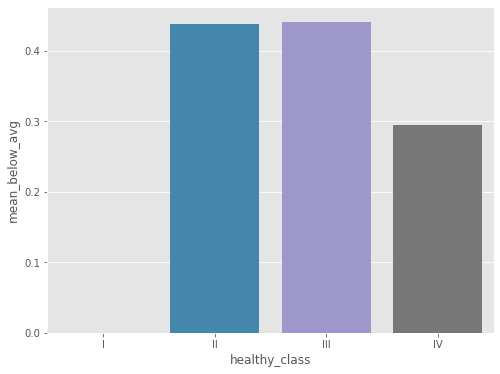

In [38]:
plt.figure(figsize=(8,6))
graph = sns.barplot(x='healthy_class', y='mean_below_avg', data=dfx2)

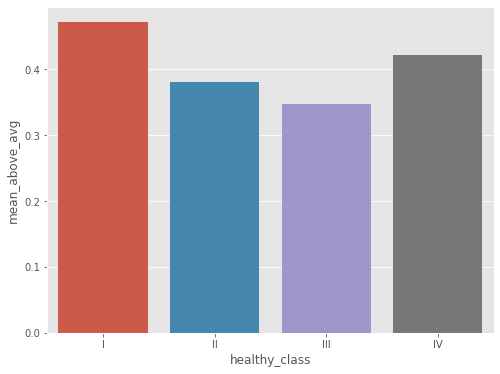

In [39]:
plt.figure(figsize=(8,6))
graph2 = sns.barplot(x='healthy_class', y='mean_above_avg', data=dfy2)

Dari rerata nilai index freedom of choices di negara berdasarkan healthy class dan gdp class-nya, dapat disimpulkan bahwa:
1. 0.440625 merupakan nilai rerata tertinggi dari freedom of choices dari negara yang gdp_capacita-nya di bawah rata-rata dan termasuk dalam kelompok healthy_class di kuartil III  

2. 0.471564 merupakan nilai rerata tertinggi dari freedom of choices dari negara yang gdp_capacita-nya di atas rata-rata dan termasuk dalam kelompok healthy_class di kuartil I  

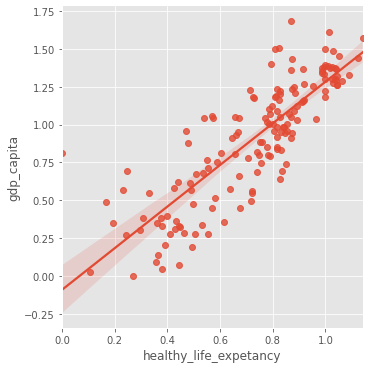

In [41]:
sns.lmplot(x ="healthy_life_expetancy", y = "gdp_capita", data=df_happy)
plt.show()